In [42]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import os, glob

In [241]:
directory = "D:/OneDrive/BF1/Data/time_traces/test/5/"
files = glob.glob(directory + "*.npz")
 
for i, f in enumerate(files):
    print(i, f)

0 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.0.npz
1 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.04.npz
2 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.08.npz
3 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.12.npz
4 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.16.npz
5 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.2.npz
6 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.24.npz
7 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.28.npz
8 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.32.npz
9 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.36.npz
10 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.4.npz
11 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.44.npz
12 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.48.npz
13 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.52.npz
14 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.56.npz
15 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.6.npz
16 D:/OneDrive/BF1/Data/time_traces/test/5\data_pg_0.6

<IPython.core.display.Javascript object>


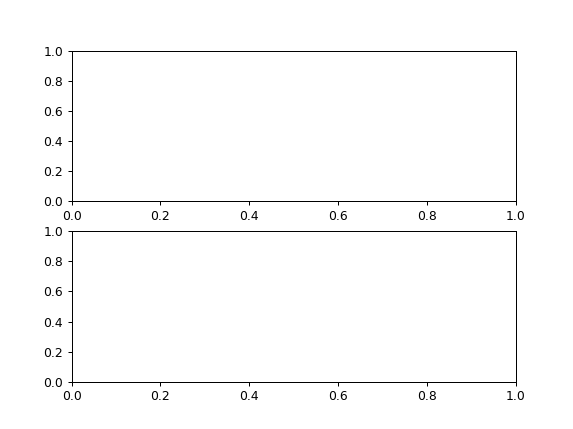

In [182]:
fig, axes = plt.subplots(2, 1)

real_ref = data[0, 0, :, 0].real
imag_ref = data[0, 0, :, 0].imag
real_sig = data[0, 0, :, 1].real
imag_sig = data[0, 0, :, 1].imag
c_ref = real_ref + 1j*imag_ref
c_sig = real_sig + 1j*imag_sig

phase_ref = np.angle(c_ref)
phase_sig = np.angle(c_sig)

phase = (phase_sig - phase_ref)%(2*np.pi)


In [ ]:
cdata = real

In [199]:
nperiods = 500
newlen = phase.shape[0]//nperiods
avgphase = phase[:newlen*nperiods].reshape(newlen,nperiods).mean(axis=1)

<IPython.core.display.Javascript object>


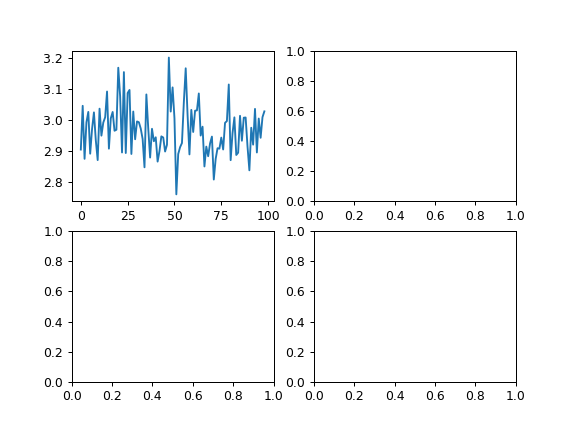

In [200]:
fig, axes = plt.subplots(2, 2)

ax = axes[0,0]
ax.plot(avgphase)

In [179]:
newlen

9

In [293]:

i=50
z = np.load(files[i])
data = z['data']

In [298]:
newlen//nperiods

99

<IPython.core.display.Javascript object>


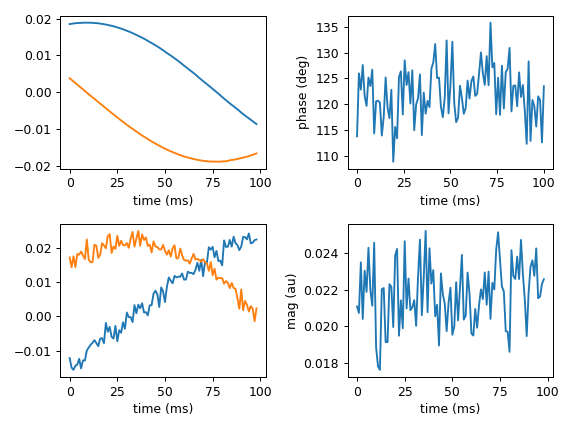

In [304]:
nperiods = 5000
newlen = data.shape[2]//nperiods*nperiods
avgdata = data[:,:,:newlen,:].reshape(2, 1,-1, nperiods, 2).mean(axis=-2)
t = np.linspace(0, 100, newlen//nperiods)

fig, axes = plt.subplots(2, 2)

ax = axes[0,0]
ax.plot(avgdata[0, 0, :, 0].real)
ax.plot(avgdata[0, 0, :, 0].imag)
ax.set_xlabel('time (ms)')

ax = axes[1,0]
ax.plot(avgdata[0, 0, :, 1].real)
ax.plot(avgdata[0, 0, :, 1].imag)
ax.set_xlabel('time (ms)')

sig = np.angle(avgdata[0, 0, :, 0].real+1j*avgdata[0, 0, :, 0].imag)-np.angle(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag)
ax = axes[0,1]
ax.plot(t, -sig*(180/np.pi))
ax.set_xlabel('time (ms)')
ax.set_ylabel("phase (deg)")

ax = axes[1,1]
ax.plot(np.abs(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag))
ax.set_xlabel('time (ms)')
ax.set_ylabel("mag (au)")


fig.tight_layout()

In [305]:
directory = "D:/OneDrive/BF1/Data/time_traces/test/6/"
files = glob.glob(directory + "*.npz")


phase_sig = []
for f in files:
    z = np.load(f)
    data = z['data']
    nperiods = data.shape[2]
    newlen = data.shape[2]//nperiods*nperiods
    avgdata = data[:,:,:newlen,:].reshape(2, 1,-1, nperiods, 2).mean(axis=-2)
    q = np.angle(avgdata[0, 0, :, 0].real+1j*avgdata[0, 0, :, 0].imag)-np.angle(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag)
    phase_sig.append(-q)


<IPython.core.display.Javascript object>


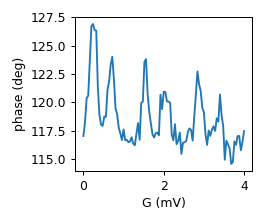

In [308]:
pg = np.linspace(0e-3, 4e-3, 101)

fig, axes = plt.subplots(1,1, figsize=(3,2.5))

ax = axes
ax.plot(pg*1e3, np.array(phase_sig)*(180/np.pi))
ax.set_ylabel('phase (deg)')
ax.set_xlabel('G (mV)')

fig.tight_layout()

In [ ]:
nperiods = 500
newlen = data.shape[2]//nperiods*nperiods
avgdata = data[:,:,:newlen,:].reshape(2, 1,-1, nperiods, 2).mean(axis=-2)

fig, axes = plt.subplots(2, 2)

ax = axes[0,0]
ax.plot(avgdata[0, 0, :, 0].real)
ax.plot(avgdata[0, 0, :, 0].imag)

ax = axes[1,0]
ax.plot(avgdata[0, 0, :, 1].real)
ax.plot(avgdata[0, 0, :, 1].imag)

ax = axes[0,1]
ax.plot(np.angle(avgdata[0, 0, :, 0].real+1j*avgdata[0, 0, :, 0].imag)-np.angle(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag))
# ax.plot()

ax = axes[1,1]
ax.plot(np.abs(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag))

In [238]:
directory = "D:/OneDrive/BF1/Data/time_traces/test/5/"
files = glob.glob(directory + "*.npz")
 
avgphase = []
for f in files:
    z = np.load(f)
    data = z['data']

    real_ref = data[0, 0, :, 0].real
    imag_ref = data[0, 0, :, 0].imag
    real_sig = data[0, 0, :, 1].real
    imag_sig = data[0, 0, :, 1].imag
    c_ref = real_ref + 1j*imag_ref
    c_sig = real_sig + 1j*imag_sig

    phase_ref = np.angle(c_ref)
    phase_sig = np.angle(c_sig)

    phase = (phase_sig - phase_ref)%(2*np.pi)
    avgphase.append(phase.mean(axis=0))
    

In [239]:
avgphase = np.array(avgphase)

In [252]:
nperiods = 5000
newlen = phase.shape[0]//nperiods
phi = phase[:newlen*nperiods].reshape(newlen,nperiods).mean(axis=1)

<IPython.core.display.Javascript object>


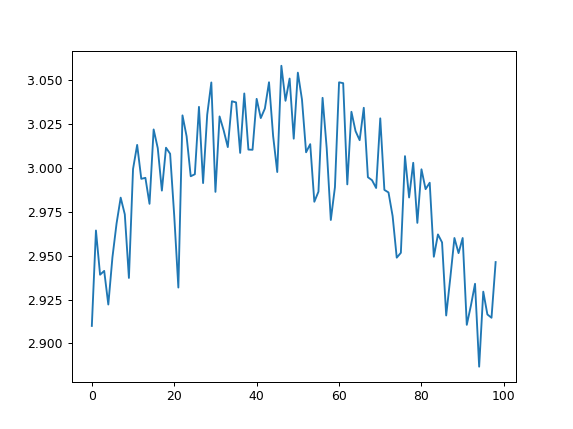

In [253]:
pg = np.linspace(0e-3, 2e-3, 51)

fig, axes = plt.subplots(1,1)

ax = axes
ax.plot(phi)

<IPython.core.display.Javascript object>


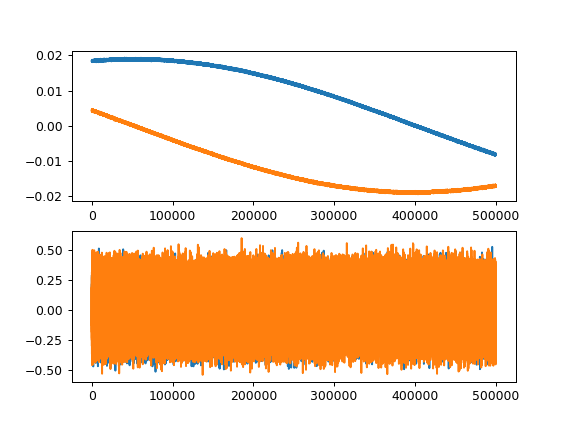

In [254]:
fig, axes = plt.subplots(2, 1)

ax = axes[0]
ax.plot(data[0, 0, :, 0].real)
ax.plot(data[0, 0, :, 0].imag)

ax = axes[1]
ax.plot(data[0, 0, :, 1].real)
ax.plot(data[0, 0, :, 1].imag)

<IPython.core.display.Javascript object>


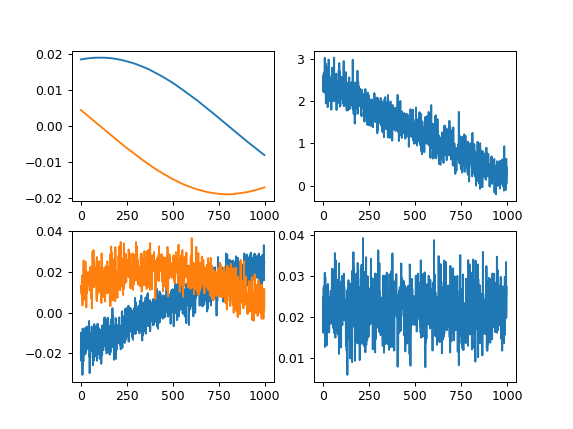

In [255]:
nperiods = 500
newlen = data.shape[2]//nperiods*nperiods
avgdata = data[:,:,:newlen,:].reshape(2, 1,-1, nperiods, 2).mean(axis=-2)

fig, axes = plt.subplots(2, 2)

ax = axes[0,0]
ax.plot(avgdata[0, 0, :, 0].real)
ax.plot(avgdata[0, 0, :, 0].imag)

ax = axes[1,0]
ax.plot(avgdata[0, 0, :, 1].real)
ax.plot(avgdata[0, 0, :, 1].imag)

ax = axes[0,1]
ax.plot(np.angle(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag))
# ax.plot()

ax = axes[1,1]
ax.plot(np.abs(avgdata[0, 0, :, 1].real+1j*avgdata[0, 0, :, 1].imag))